In [1]:
from objects import objects_new2 as obj
from animation import animation as anim

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.lines as lines
import matplotlib.animation as animation
import math
from scipy.stats import norm
import pickle
import io
import time
import gc

In [3]:
# def data_init():
np.random.seed(19680801)
n_population = int(1e6)
mean_of_popul = 165
std_of_popul = 8
population = std_of_popul*np.random.randn(n_population) + mean_of_popul
n_try = 10000
sample_size = 50    
data_to_plot = np.zeros(n_try)
n_bins = 15

# First simples ---------------------------------------------------------------------------------


# Hist ---------------------------------------------------------------------------------

for i in range(n_try):
    data_to_plot[i] = np.mean(np.random.choice(population,sample_size))

xlim = [math.floor(data_to_plot.min()), math.floor(data_to_plot.max())+1]
bins = range(int(xlim[0]),int(xlim[1])+1)
bins = np.linspace(xlim[0],xlim[1]+1,(xlim[1]+2-xlim[0])*2-1)
n, bins = np.histogram(data_to_plot, bins)
x_ticks = np.linspace(100,200,101)
data_to_plot[0] = 166.7
# Pdf

x = np.linspace(bins[0]-10,bins[-1]+10,5000)
mean = mean_of_popul
std = std_of_popul/np.sqrt(sample_size)
scale = np.sum(n)/2
max_pdf = norm.pdf(mean,mean,std)
center = data_to_plot[0]
delta = 2.21744

/home/kmaksyme/apps/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [4]:
data_to_plot[0]

166.7

In [5]:
my_dpi = 96
frame = obj.Frame(my_dpi=my_dpi)
frame.axes.set_xlim(xlim)
frame.axes.set_xticks(bins.astype('int'))
frame.axes.set_ylim(-0.3 * max_pdf, 1.1 * max_pdf)
frame.update_axes_ratio()

hist = obj.Hist(bins, n, data_to_plot)
norm_pdf = obj.DistNorm(mean, std, x, norm.pdf)
point1 = obj.Point(x=data_to_plot[0], rx=0.3)
point2 = obj.Point(x=data_to_plot[1], rx=0.3)
interval = obj.Interval(data_to_plot[0] - delta, data_to_plot[0] + delta, 0.02, norm_pdf)
frame.add_objects([hist, norm_pdf, point1, point2, interval])

/user/kmaksyme/home/apps/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
actions = {}
scene = anim.Scene(frame.fig, [], fps = 60)

# Point 1 app
t_begin = 0.5
t_end = t_begin + 0.75
actions['p1_app'] = point1.appear(t_begin, t_end) 

# Point 2 app
t_begin = actions['p1_app'].end_time + 1
t_end = t_begin + 0.75
actions['p2_app'] = point2.appear(t_begin, t_end) 

# Hist
t_begin = actions['p2_app'].end_time + 1
t_end = t_begin + 2
actions['hist_app'] = hist.appear_down_to_up(t_begin, t_end) 

# Points disapp
t_begin = actions['hist_app'].end_time + 1
t_end = t_begin + 0.75
actions['p1_disapp'] = point1.disappear(t_begin, t_end) 
actions['p2_disapp'] = point2.disappear(t_begin, t_end) 

# Pdf app
t_begin = actions['p2_disapp'].end_time + 1
t_end = t_begin + 2
actions['pdf_app'] = norm_pdf.pdf_appear_left_to_right(t_begin, t_end, frame) 

# Point 1 app
t_begin = actions['pdf_app'].end_time + 1
t_end = t_begin + 0.75
actions['p1_app_2'] = point1.appear(t_begin, t_end) 

# Hist disapp
t_begin = actions['p1_app_2'].end_time + 1
t_end = t_begin + 1.5
actions['hist_disapp_u2d'] = hist.disappear_up_to_down(t_begin, t_end) 
actions['hist_disapp_trans'] = hist.disappear_trans(t_begin, t_end) 

# Zoom
t_begin = actions['hist_disapp_trans'].end_time + 1
t_end = t_begin + 2.5
actions['zoom'] = frame.zoom(t_begin, t_end, data_to_plot[0] - 10, data_to_plot[0] + 10,
                            -max_pdf) 

# Moving pdf to 162
t_begin = actions['zoom'][0].end_time + 1
t_end = t_begin + 1
actions['move162'] = norm_pdf.move(t_begin, t_end, 162.) 
speed = np.abs((data_to_plot[0] - 162))

# Moving pdf to 174
t_begin = actions['move162'].end_time + 1
t_end = t_begin + (174-162)/(speed * 1.5)
actions['move174'] = norm_pdf.move(t_begin, t_end, 174.) 

# Moving pdf to 170
t_begin = actions['move174'].end_time + 1
t_end = t_begin + (174-170)/(speed)
actions['move170'] = norm_pdf.move(t_begin, t_end, 170.) 

# Moving pdf to center
t_begin = actions['move170'].end_time + 1
t_end = t_begin + 1.5
actions['move_c'] = norm_pdf.move(t_begin, t_end, center) 

# Point disapp
t_begin = actions['move_c'].end_time + 1
t_end = t_begin + 0.75
actions['p1_disapp2'] = point1.disappear(t_begin, t_end) 

# ticks disapp
t_begin = actions['p1_disapp2'].end_time + 1
t_end = t_begin + 0.75
actions['ticks_disapp'] = frame.ticks_disappear(t_begin, t_end)

# Mean line appear
t_begin = actions['ticks_disapp'].end_time + 1
t_end = t_begin + 0.75
actions['ml_appear'] = norm_pdf.mean_line_appear(t_begin, t_end)

# Area appear
t_begin = actions['ml_appear'].end_time + 1
t_end = t_begin + 1
actions['area_appear'] = norm_pdf.area_appear_from_mean(t_begin, t_end, 0.95)
actions['ml_change_alpha'] = norm_pdf. mean_line_change_alpha(t_begin, t_end, 0.5)

# Text appear
t_begin = actions['area_appear'].end_time
t_end = t_begin + 0.5
actions['text_appear'] = norm_pdf.text_appear(t_begin, t_end)

# Change range
t_begin = actions['text_appear'].end_time + 1
t_end = t_begin + 0.7
actions['change_range1'] = norm_pdf.p_change(t_begin, t_end, 0.99)
t_begin = actions['change_range1'].end_time + 1
t_end = t_begin + 0.7
actions['change_range2'] = norm_pdf.p_change(t_begin, t_end, 0.90)
t_begin = actions['change_range2'].end_time + 1
t_end = t_begin + 0.7
actions['change_range3'] = norm_pdf.p_change(t_begin, t_end, 0.95)


# Point 1 app
t_begin = actions['change_range3'].end_time + 1
t_end = t_begin + 0.75
actions['p1_app_3'] = point1.appear(t_begin, t_end) 


# Moving pdf to 162
t_begin = actions['change_range3'].end_time + 1
t_end = t_begin + 1
actions['move162_2'] = norm_pdf.move(t_begin, t_end, 162)

# Moving pdf to left bound
delta = 2.21744
t_begin = actions['move162_2'].end_time + 1
t_end = t_begin + 1
actions['move_left_bound'] = norm_pdf.move(t_begin, t_end, data_to_plot[0] - delta)

# Left bound appearing
delta = 2.21744
t_begin = actions['move_left_bound'].end_time + 1
t_end = t_begin + 0.5
actions['appear_left_bound'] = interval.line_left_appear(t_begin, t_end)

# Moving pdf to right bound
delta = 2.21744
t_begin = actions['appear_left_bound'].end_time + 1
t_end = t_begin + 1.5
actions['move_right_bound'] = norm_pdf.move(t_begin, t_end, data_to_plot[0] + delta)

# Right bound appearing
t_begin = actions['move_right_bound'].end_time + 1
t_end = t_begin + 0.5
actions['appear_right_bound'] = interval.line_right_appear(t_begin, t_end)

# Moving pdf to 172
t_begin = actions['appear_right_bound'].end_time + 1
t_end = t_begin + 1.5
actions['move172_2'] = norm_pdf.move(t_begin, t_end, 174)

# Dist disappear
t_begin = actions['appear_right_bound'].end_time + 1.5
t_end = t_begin + 1
actions['disappear_dist'] = norm_pdf.all_disappear(t_begin, t_end)

# Interval area appearing
t_begin = actions['move172_2'].end_time + 1
t_end = t_begin + 0.75
actions['appear_inter_area'] = interval.area_appear(t_begin, t_end)

# # Ticks appear
# t_begin = actions['appear_inter_area'].end_time + 1
# t_end = t_begin + 0.75
# actions['ticks_appear'] = frame.ticks_change_alpha(t_begin, t_end, 0.5)

# Bounds texts appearing
t_begin = actions['appear_inter_area'].end_time + 1
t_end = t_begin + 0.75
actions['appear_left_text'] = interval.text_appear(t_begin, t_end, 0)
actions['appear_right_text'] = interval.text_appear(t_begin, t_end, 1)

# p text appearing
t_begin = actions['appear_right_text'].end_time + 1
t_end = t_begin + 0.75
actions['appear_p_text'] = interval.text_appear(t_begin, t_end, 2)

# p to 99
t_begin = actions['appear_p_text'].end_time + 1
t_end = t_begin + 0.75
actions['p_change99'] = interval.p_change(t_begin, t_end, 0.99)

# p to 90
t_begin = actions['p_change99'].end_time + 1
t_end = t_begin + 0.75
actions['p_change90'] = interval.p_change(t_begin, t_end, 0.90)

# p to 95
t_begin = actions['p_change90'].end_time + 1
t_end = t_begin + 0.75
actions['p_change95'] = interval.p_change(t_begin, t_end, 0.95)

# End
t_begin = actions['p_change95'].end_time + 3
t_end = t_begin + 0.5
actions['end'] = anim.Action([], None, t_begin, t_end, None)

for a in actions.values():
    if not isinstance(a, (list,)):
        scene.add_actions([a])
    else:
        scene.add_actions(a)
        
scene.run(dpi=my_dpi,file_name='test.mp4')#, times=[40., np.inf])

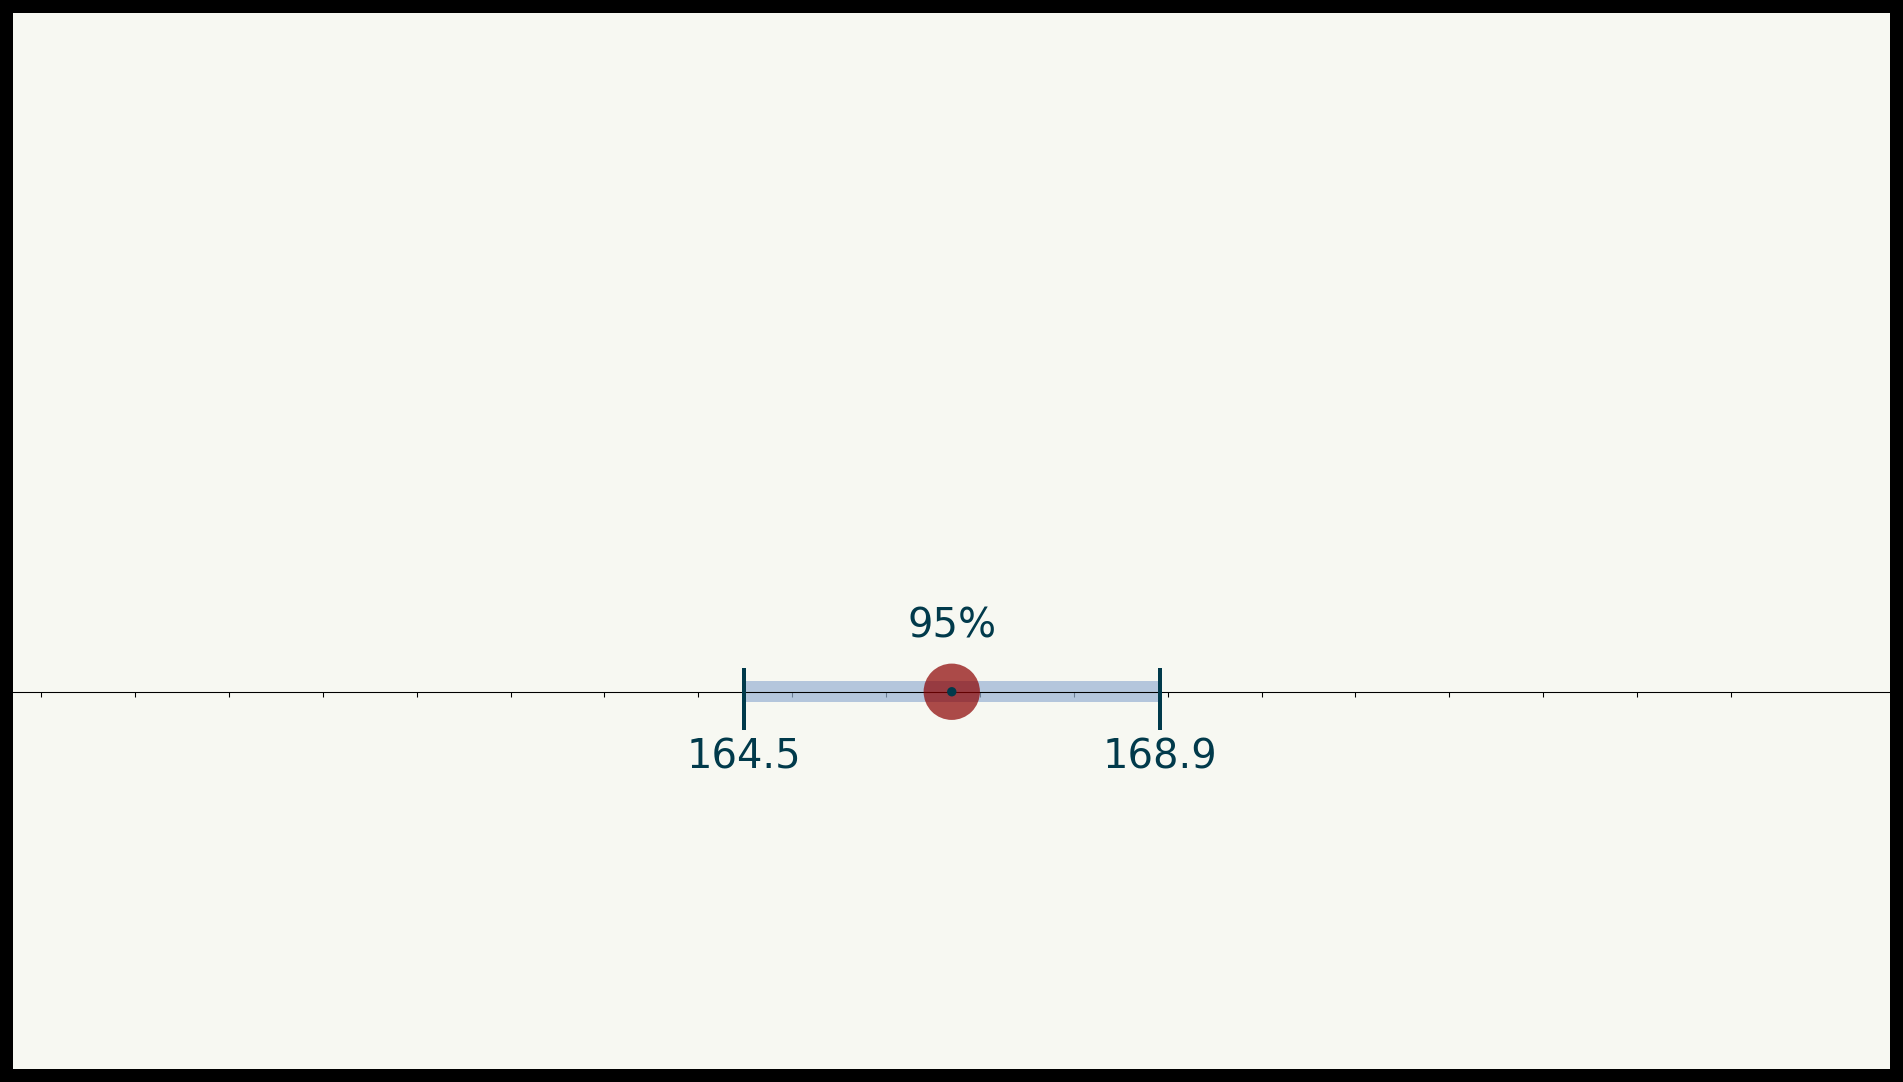

In [7]:
plt.draw()
plt.show()